### Tf-keras 和 keras 区别
- tf.kears

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3870, 8) (3870,)
(11610, 8) (11610,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_valid_s=scaler.fit_transform(x_valid)
x_test_s=scaler.transform(x_test)

In [6]:
# learning rate:[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
learning_rates=[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
histories=[]
for lr in learning_rates:
    model=keras.models.Sequential([
        keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer=keras.optimizers.SGD(lr)
    model.compile(loss='mean_squared_error',optimizer=optimizer)

    callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
    history=model.fit(x_train_s,y_train,validation_data=(x_valid_s,y_valid),epochs=100,callbacks=callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 62us/sample - loss: 4.3339 - val_loss: 3.7637
Epoch 2/100
11610/11610 [==============================] - 0s 41us/sample - loss: 3.0017 - val_loss: 2.7759
Epoch 3/100
11610/11610 [==============================] - 0s 41us/sample - loss: 2.2611 - val_loss: 2.1953
Epoch 4/100
11610/11610 [==============================] - 0s 41us/sample - loss: 1.8198 - val_loss: 1.8350
Epoch 5/100
11610/11610 [==============================] - 0s 42us/sample - loss: 1.5395 - val_loss: 1.5937
Epoch 6/100
11610/11610 [==============================] - 1s 46us/sample - loss: 1.3482 - val_loss: 1.4215
Epoch 7/100
11610/11610 [==============================] - 0s 42us/sample - loss: 1.2111 - val_loss: 1.2939
Epoch 8/100
11610/11610 [==============================] - 0s 41us/sample - loss: 1.1092 - val_loss: 1.1968
Epoch 9/100
11610/11610 [==============================] - 0s 41us/sample - loss: 1.032

Epoch 76/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5784 - val_loss: 0.6309
Epoch 77/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5765 - val_loss: 0.6287
Epoch 78/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5746 - val_loss: 0.6265
Epoch 79/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5727 - val_loss: 0.6244
Epoch 80/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5708 - val_loss: 0.6222
Epoch 81/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5690 - val_loss: 0.6201
Epoch 82/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5672 - val_loss: 0.6180
Epoch 83/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5654 - val_loss: 0.6161
Epoch 84/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5636 - val_loss: 0.6140
Epoch 85/100
11610/

Epoch 59/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5025 - val_loss: 0.5460
Epoch 60/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5011 - val_loss: 0.5442
Epoch 61/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4997 - val_loss: 0.5417
Epoch 62/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4983 - val_loss: 0.5398
Epoch 63/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4970 - val_loss: 0.5388
Epoch 64/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4956 - val_loss: 0.5364
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 61us/sample - loss: 2.2662 - val_loss: 0.9881
Epoch 2/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.7812 - val_loss: 0.7643
Epoch 3/100
11610/11610 [==============================] - 0s 41us/sample - loss:

11610/11610 [==============================] - 0s 42us/sample - loss: 0.4148 - val_loss: 0.4431
Epoch 5/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3939 - val_loss: 0.4201
Epoch 6/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4212 - val_loss: 0.4614
Epoch 7/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4010 - val_loss: 0.4027
Epoch 8/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3846 - val_loss: 0.3945
Epoch 9/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3751 - val_loss: 0.3876
Epoch 10/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3683 - val_loss: 0.3822
Epoch 11/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3656 - val_loss: 0.3785
Epoch 12/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3669 - val_loss: 0.3895
Epoch 13/100
11610/11610 [===========

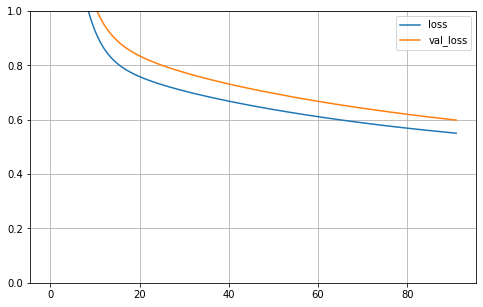

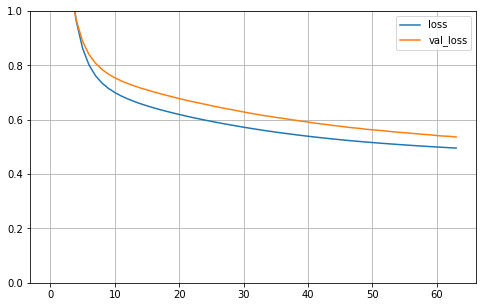

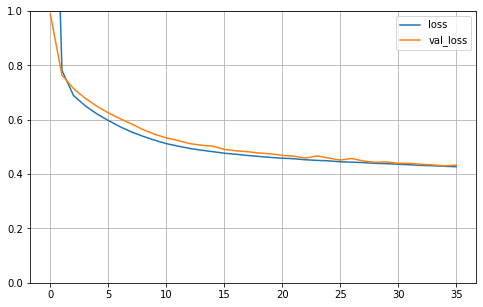

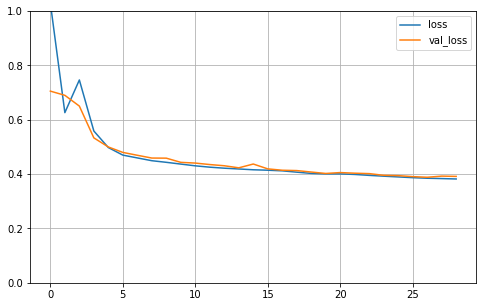

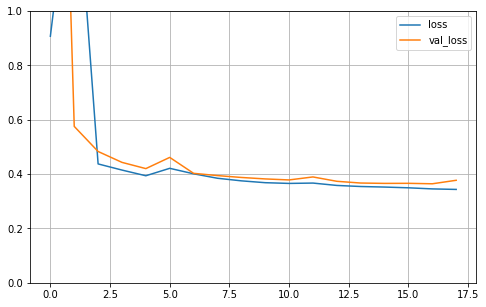

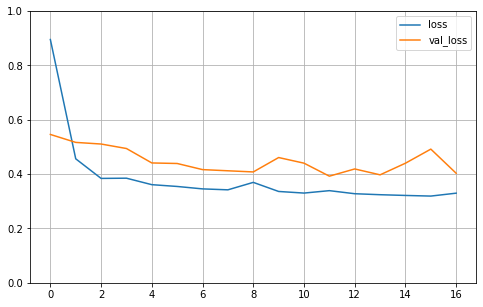

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
for history in histories:
    plot_learning_curves(history)

In [11]:
model.evaluate(x_test_s,y_test)

5160/5160 [==============================] - 0s 21us/sample - loss: 0.4020


0.40204299263251847